## RAPORT (20 pkt) - praca w zespołach

Jesteście grupą doradców inwestycyjnych, do których zgłasza się klient z prośbą o skomponowanie portfela inwestycyjnego. Przygotujcie raport zawierający rekomendacje (1 główną i 2 alternatywne) składu portfela, który będzie spójny z celami inwestycyjnymi Waszego klienta. Zaproponujcie:
- 1 główną rekomendację, która wg. Was będzie najlepiej realizowała cele inwestora
- 2 alternatywne rekomendacje, jeśli apetyt na ryzyko Waszego klienta okazałby się mniejszy lub większy.

Wybierzcie typ swojego klienta, dla którego przygotujecie raport:
- 25-letnia absolwentka SGH
- para absolwentów SGH z 2 dzieci w wieku ok. 35 lat
- para absolwentów SGH w wieku 55 lat

W razie potrzeby dokonajcie dodatkowych założeń dot. np. preferencji klienta, jego horyzontu planowania, apetytu na ryzyko, itp.

W szczególności zaraportujcie:
- oczekiwaną stopę zwrotu w horyzoncie inwestycyjnym istotnym dla Waszego klienta 
- Value at Risk 1% i  10% stopy zwrotu w horyzoncie inwestycyjnym istotnym dla Waszego klienta 
- jakie podejście przyjęliście do dylematu wyboru między portfelami o różnym poziomie ryzyka i stopy zwrotu ROI.

W ramach analizy wrażliwości przeprowadź jeden z ponizszych eksperymentow:
- załóż, że historyczne stopy zwrotu wybranego aktywa, np. Akcji konkretnej spółki akcyjnej,  są złym predyktorem oczekiwanej stopy zwrotu tego aktywa w przyszłości i zostały one nadpisane bardziej złożonymi i - najprawdopodobniej - trafniejszymi prognozami uwzględniającymi inne czynniki, w tym fundamentalne. Odpowiedz na pytanie, jak zmiana tych prognoz względem ich historycznych wartości wpłynie na udział tego aktywa w Twoim portfelu?
- podziel okres historyczny, na którym uczysz parametry modelu na dwia równe okresy i dokonaj analogicznej analizy na kazdym z nich. Jak Wasze wnioski róznią się (lub nie róznią) dla kazdego z okresów?

<b> Dodatkowo:</b> za napisanie symulacji wykorzystującej pobrane z sieci rzeczywiste dane będą przyznane dodatkowe 2 punkty.

wybieramy jeden typ klienta i trzeba wymyslic cele dla klienta  np. po co 25 latka mialaby inwestowac/co chce osiagnac, jaki ma apetyt na ryzyko.
Wybieramy horyzont planowania i przedstawiamy stope zwrotu wlasnie w takim horyzoncie. Bedziemy symulowac jak sie zmienia wartosc portfela. Przedstawic rozklad ROI, wskazac 1 percentyl i 10 percentyl (to o Value at Risk), czy beda ujemne czy beda dodatnie pokazac
Pokazac tradeoff miedzy poziomem ryzyka a stopa zwrotu ROI
Np mamy akcje orlenu i slabo performowal ale my np mowimy ze nie wierzymy i mozemy nadpisac hisroryczna stope zwrotu np podniesc i zrobic znowu analize i pokazac co by bylo. Napisac np. orlenu by nie bylo w ogole w moim portfelu, ale gdybym podniosl historyczna to zajomowalby tyle procent w portfelu. Zmieniamy sama srednia i zostawiamy korelacje i wariancje taka jak jest w historii
ALBO
Podzielic okres na dwa rozne okresy np. mamy 10 letni okres dzielimy to po 5 lat i zrobic analogicznie dla pierwszego i drugiego tak jak wyzej. Neinajlepiej jakby wyszlo ze portfel sie totalnie rozni po 5 latach

### Wybrano 25 latke, 5 letni okres inwestycji

### Obrabiamy dane

In [8]:
using DataFrames
using Plots
using StatsBase
using LinearAlgebra

In [10]:
stocks = [parse.(Float64,x[2:end]) for x in split.(readlines("./akcje.txt"), ';')];
stocks = DataFrame(transpose(reduce(hcat, stocks)),
    [Symbol("stock_$i") for i in 1:length(stocks[1])]);
#Dzielimy df
stock_to_analyse = first(stocks,1260)
stock_to_analyse1 = first(stock_to_analyse,630)
stock_to_analyse2 = last(stock_to_analyse,630)
stock_to_analyse

1260×11 DataFrame
  Row │ stock_1  stock_2  stock_3  stock_4  stock_5  stock_6  stock_7  stock_8 ⋯
      │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │    3.25     12.7     71.5     11.4     4.5     35.2      6.8      26.3 ⋯
    2 │    3.25     12.9     73.0     11.6     4.5     34.9      7.2      25.4
    3 │    3.2      12.8     74.5     12.0     4.5     34.9      7.1      24.4
    4 │    3.15     13.0     72.5     12.0     4.5     34.7      7.0      24.0
    5 │    3.25     13.0     75.0     11.6     4.3     34.7      6.9      22.4 ⋯
    6 │    3.15     12.9     74.5     11.4     4.4     33.6      6.95     21.8
    7 │    3.1      12.5     76.5     11.1     4.3     32.8      6.7      21.4
    8 │    3.15     12.2     78.5     11.0     3.9     33.3      6.6      21.6
    9 │    3.15     11.7     79.0     11.0     4.05    33.3      6.7      22.5 ⋯
   10 │    3.15     11.6     79.0     11.2     3.95    32.6      6.5      22.7
   11 │    3.1      11.5     81.5     11.1     4.0     33.1      6.35     23.5
  ⋮   │    ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮    ⋱
 1251 │    0.99     24.4     88.0     23.5     1.29     7.85    12.65     62.8
 1252 │    0.99     24.4     88.0     24.0     1.33     8.1     12.75     61.9 ⋯
 1253 │    0.99     25.2     91.0     23.8     1.46     8.25    12.8      60.0
 1254 │    0.99     25.3     93.0     24.9     1.49     8.2     12.85     60.1
 1255 │    1.0      25.6     92.0     25.0     1.49     8.2     13.1      59.9
 1256 │    1.01     25.6     92.7     25.5     1.59     8.25    13.35     59.4 ⋯
 1257 │    1.01     25.5     92.9     25.3     1.55     8.2     13.5      61.3
 1258 │    1.01     25.8     92.5     25.4     1.55     8.1     13.6      60.4
 1259 │    1.01     26.2     89.1     24.5     1.55     7.9     13.85     59.5
 1260 │    1.0      25.7     90.1     26.0     1.46     7.75    13.7      63.0 ⋯
                                                 3 columns and 1239 rows omitted

In [11]:
describe(stock_to_analyse)

11×7 DataFrame
 Row │ variable  mean       min      median   max      nmissing  eltype   
     │ Symbol    Float64    Float64  Float64  Float64  Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────
   1 │ stock_1     3.26208     0.73    3.465     6.0          0  Float64
   2 │ stock_2    19.7137     10.0    19.0      33.4          0  Float64
   3 │ stock_3   108.005      63.1   111.75    158.5          0  Float64
   4 │ stock_4    12.0504      6.2    11.1      26.0          0  Float64
   5 │ stock_5     3.01558     1.01    3.2       5.0          0  Float64
   6 │ stock_6    59.9416      5.45   44.85    364.5          0  Float64
   7 │ stock_7     9.3804      5.2     8.9      17.15         0  Float64
   8 │ stock_8    35.3267     19.3    32.1      79.6          0  Float64
   9 │ stock_9    25.7122     15.2    25.4      40.6          0  Float64
  10 │ stock_10   52.8366     27.7    47.0      93.0          0  Float64
  11 │ stock_11    1.10957     0.62    1.04      1.92         0  Float64

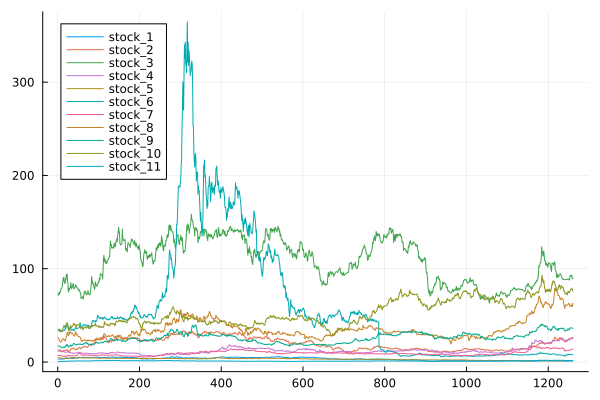

In [12]:
plot(Matrix(stock_to_analyse), labels = permutedims(names(stock_to_analyse)),legend=:topleft)

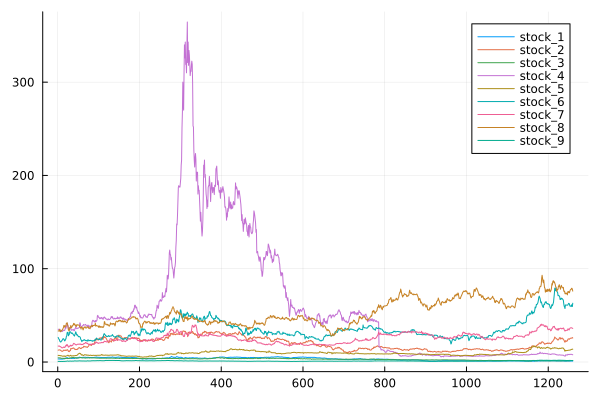

In [13]:
plot(Matrix(stock_to_analyse[!,Not(3,4)]),labels = permutedims(names(stock_to_analyse)),legend=:topright)

In [15]:
returns = mapcols(col -> col/col[1], stock_to_analyse)
first(returns, 10)

10×11 DataFrame
 Row │ stock_1   stock_2   stock_3  stock_4   stock_5   stock_6   stock_7   st ⋯
     │ Float64   Float64   Float64  Float64   Float64   Float64   Float64   Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1.0       1.0       1.0      1.0       1.0       1.0       1.0       1. ⋯
   2 │ 1.0       1.01575   1.02098  1.01754   1.0       0.991477  1.05882   0.
   3 │ 0.984615  1.00787   1.04196  1.05263   1.0       0.991477  1.04412   0.
   4 │ 0.969231  1.02362   1.01399  1.05263   1.0       0.985795  1.02941   0.
   5 │ 1.0       1.02362   1.04895  1.01754   0.955556  0.985795  1.01471   0. ⋯
   6 │ 0.969231  1.01575   1.04196  1.0       0.977778  0.954545  1.02206   0.
   7 │ 0.953846  0.984252  1.06993  0.973684  0.955556  0.931818  0.985294  0.
   8 │ 0.969231  0.96063   1.0979   0.964912  0.866667  0.946023  0.970588  0.
   9 │ 0.969231  0.92126   1.1049   0.964912  0.9       0.946023  0.985294  0. ⋯
  10 │ 0.969231  0.913386  1.1049   0.982456  0.877778  0.926136  0.955882  0.
                                                               4 columns omitted

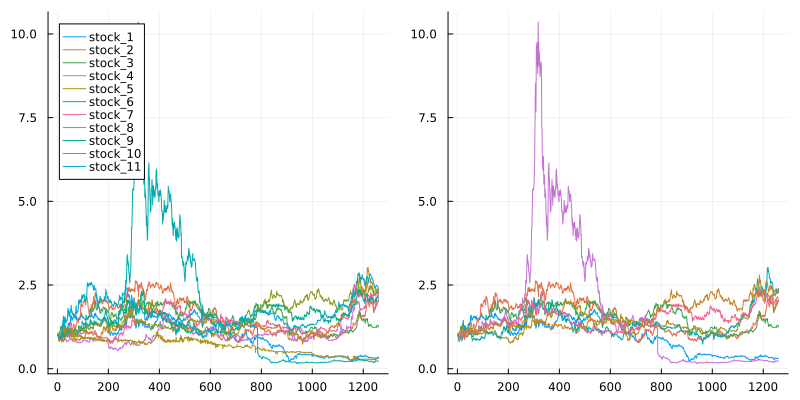

In [16]:
p1 = plot(Matrix(returns), labels = permutedims(names(returns)), legend=:topleft)
p2 = plot(Matrix(returns[!,Not(4,5,11)]), legend=false)
plot(p1,p2, layout = 2, size=(800,400))

In [17]:
rates_of_return = log.(Matrix(stocks)) - log.(circshift(Matrix(stocks), (1,0)))
rates_of_return = DataFrame(rates_of_return,
    [Symbol("stock_$i") for i in 1:size(rates_of_return)[2]])[2:end,:]

2775×11 DataFrame
  Row │ stock_1      stock_2       stock_3      stock_4      stock_5      stoc ⋯
      │ Float64      Float64       Float64      Float64      Float64      Floa ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │  0.0          0.0156253     0.020762     0.0173917    0.0         -0.0 ⋯
    2 │ -0.0155042   -0.00778214    0.0203397    0.0339016    0.0          0.0
    3 │ -0.0157484    0.0155042    -0.0272126    0.0          0.0         -0.0
    4 │  0.0312525    0.0           0.0339016   -0.0339016   -0.0454624    0.0
    5 │ -0.0312525   -0.00772205   -0.00668899  -0.0173917    0.0229895   -0.0 ⋯
    6 │ -0.0160003   -0.0314987     0.0264916   -0.0266682   -0.0229895   -0.0
    7 │  0.0160003   -0.0242927     0.0258079   -0.00904984  -0.0976385    0.0
    8 │  0.0         -0.0418471     0.00634923   0.0          0.0377403    0.0
    9 │  0.0         -0.00858374    0.0          0.0180185   -0.0250013   -0.0 ⋯
   10 │ -0.0160003   -0.00865806    0.0311552   -0.00896867   0.0125788    0.0
   11 │  0.0160003    0.0           0.0420482   -0.0181823    0.0         -0.0
  ⋮   │      ⋮            ⋮             ⋮            ⋮            ⋮            ⋱
 2766 │  0.0447002   -0.00197629    0.0          0.00497101   0.0178576   -0.0
 2767 │ -0.0165293   -0.0209903     0.0         -0.0082988   -0.0129149   -0.0 ⋯
 2768 │ -0.0168071   -0.0121953    -0.0149106   -0.040822    -0.00494272  -0.0
 2769 │ -0.0286553    0.0116901     0.0          0.027399    -0.0140624   -0.0
 2770 │ -0.011696     0.033295      0.0244648   -0.0291366   -0.0170472   -0.0
 2771 │ -0.0238106   -0.000977995  -0.00835493  -0.0210904   -0.0116851    0.0 ⋯
 2772 │ -0.0305834    0.0270287     0.0107293   -0.0107144    0.0149326   -0.0
 2773 │  0.0425596    0.0263173     0.011788     0.0575573    0.0323564    0.0
 2774 │  0.0176996   -0.0102565     0.0212568    0.0134682    0.00892863  -0.0
 2775 │ -0.00586512  -0.00658206   -0.00575265  -0.00671143   0.0498478    0.0 ⋯
                                                 6 columns and 2754 rows omitted

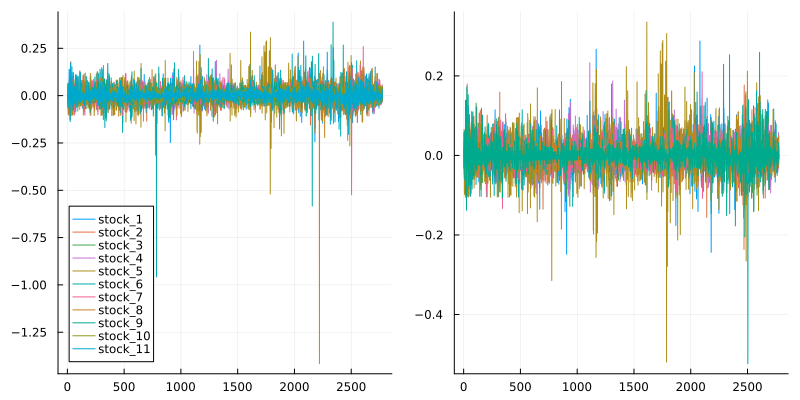

In [18]:
p1 = plot(Matrix(rates_of_return), labels = permutedims(names(rates_of_return)), 
    legend=:bottomleft)
p2 = plot(Matrix(rates_of_return[!,Not(6,8)]), legend=false)
plot(p1,p2, layout = 2, size=(800,400))

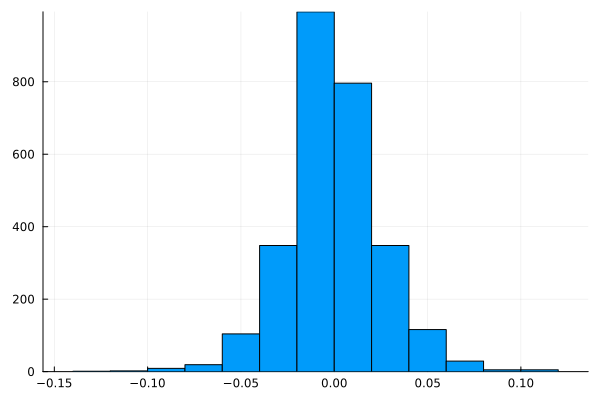

In [19]:
histogram(rates_of_return[:, 10], bins = 20, legend = false) # dla 10. spółki

In [25]:
### Srednie i MNK

In [ ]:
moving_average(vec,window) = [sum(@view vec[i:(i+window-1)])/window 
                            for i in 1:(length(vec)-(window-1))]
rollmeancol(df, window) =  mapcols(col -> moving_average(col,window),df)

In [ ]:
ma20  = rollmeancol(stocks,20)
ma50  = rollmeancol(stocks,50)
ma200  = rollmeancol(stocks,200);

In [26]:
least_squares(X,y) = (X = hcat(ones(size(X)[1]), X); (X'*X)^-1*X'*y)

least_squares (generic function with 1 method)

In [27]:
βs = least_squares(collect(1:size(stocks)[1]), stocks[!,:stock_3])

2-element Vector{Float64}:
 50.627091907469435
  0.09478548909498075

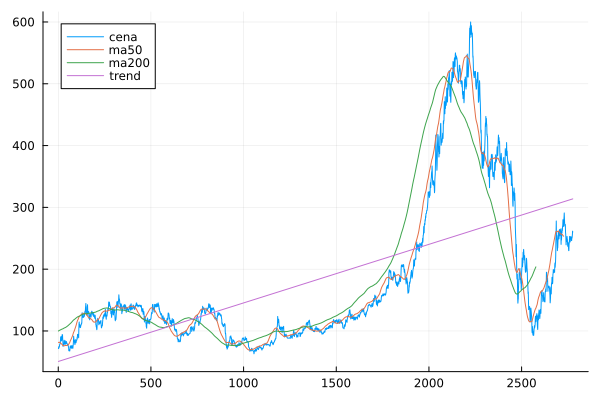

In [28]:
trendline =  βs[1] .+ βs[2] * collect(1:size(stocks)[1]) 

plot(stocks[!, 3], label = "cena")
plot!(ma50[!, 3], label = "ma50")
plot!(ma200[!,3], label = "ma200")
plot!(trendline, label = "trend", legend=:topleft)

### Wariant 1

In [47]:
# 1 rok = 252 dni sesyjne
r_min = 1.05 ^ (1/1260) - 1

3.8723102235405094e-5

### WARIANT 2: wariancja portfela nie może być wyższa niż połowa wariancji stóp zwrotu z akcji o najwyższej wariancji


In [48]:
rates_of_return = log.(Matrix(stock_to_analyse)) - log.(circshift(Matrix(stock_to_analyse), (1,0)))
rates_of_return = DataFrame(rates_of_return,
    [Symbol("stock_$i") for i in 1:size(rates_of_return)[2]])[2:end,:]

1259×11 DataFrame
  Row │ stock_1      stock_2      stock_3      stock_4      stock_5      stock ⋯
      │ Float64      Float64      Float64      Float64      Float64      Float ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │  0.0          0.0156253    0.020762     0.0173917    0.0         -0.00 ⋯
    2 │ -0.0155042   -0.00778214   0.0203397    0.0339016    0.0          0.0
    3 │ -0.0157484    0.0155042   -0.0272126    0.0          0.0         -0.00
    4 │  0.0312525    0.0          0.0339016   -0.0339016   -0.0454624    0.0
    5 │ -0.0312525   -0.00772205  -0.00668899  -0.0173917    0.0229895   -0.03 ⋯
    6 │ -0.0160003   -0.0314987    0.0264916   -0.0266682   -0.0229895   -0.02
    7 │  0.0160003   -0.0242927    0.0258079   -0.00904984  -0.0976385    0.01
    8 │  0.0         -0.0418471    0.00634923   0.0          0.0377403    0.0
    9 │  0.0         -0.00858374   0.0          0.0180185   -0.0250013   -0.02 ⋯
   10 │ -0.0160003   -0.00865806   0.0311552   -0.00896867   0.0125788    0.01
   11 │  0.0160003    0.0          0.0420482   -0.0181823    0.0         -0.00
  ⋮   │      ⋮            ⋮            ⋮            ⋮            ⋮             ⋱
 1250 │ -0.0100503   -0.0162605   -0.0101753    0.0          0.0395308   -0.01
 1251 │  0.0          0.0          0.0          0.0210534    0.0305367    0.03 ⋯
 1252 │  0.0          0.0322609    0.0335227   -0.00836825   0.0932575    0.01
 1253 │  0.0          0.0039604    0.02174      0.0451822    0.0203397   -0.00
 1254 │  0.0100503    0.011788    -0.0108109    0.00400802   0.0          0.0
 1255 │  0.00995033   0.0          0.0075799    0.0198026    0.0649579    0.00 ⋯
 1256 │  0.0         -0.0039139    0.00215517  -0.00787406  -0.0254791   -0.00
 1257 │  0.0          0.011696    -0.004315     0.00394478   0.0         -0.01
 1258 │  0.0          0.0153849   -0.0374493   -0.0360761    0.0         -0.02
 1259 │ -0.00995033  -0.0192684    0.0111608    0.0594234   -0.0598185   -0.01 ⋯
                                                 6 columns and 1238 rows omitted

In [49]:
# wyliczamy średnią i odchylenie standardowe stopy zwrotu dla każdego papieru i na tej podstawie wyznaczamy ograniczenie
r_mean = Array(combine(rates_of_return, names(rates_of_return) .=> mean))
r_std = Array(combine(rates_of_return, names(rates_of_return) .=> std)) #odchylenie standardowe

# ograniczenie wariancji:
var_max = 0.1(maximum(r_std)^2) #nasz cap na wariancje w 2. wariancie, zmienna oznacza dzienne ryzyko tutaj ponad 50% lub 70% jak sie wezmie pierwiastek. rozwazyc w raporcie raczj mniejesze ryzyko

sqrt(var_max * 1260)


0.5314478563196132

#### Bazowy portfel funduszu

- tworzymy macierze kowariancji i korelacji na podstawie stóp zwrotu 
- przyjmujemy początkowe wagi dla portfela
- funkcje obliczające średni zwrot z portfela i wariancję portfela

(por. np. https://www.bankier.pl/wiadomosc/Dywersyfikacja-7337529.html)

In [50]:
covar = cov(Matrix(rates_of_return))
corr = cor(Matrix(rates_of_return))
weights = ones(size(stocks)[2])/size(stocks)[2];

In [51]:
portfolio_mean(weights; r_mean = r_mean) =  sum(weights .* r_mean') # ona implementuje wzor na oczekiwana stope zwrotu portfela sobie zobaczyc
portfolio_var(weights; covar = covar) = weights'*covar*weights # ona implementuje wariancje portfela to moze tez byc wzor na ryzyko musze sprawdzic edit.nawet na pewno jest
#wzory z bankier pl
#tip zeby brac malo skorelowane bo ryzyko bedzie sie wtedy obnizalo
#zrobic wykres stopy zwrotu i ryzyka taki jak na bankier pl takie "zagle"

portfolio_var (generic function with 1 method)

### OPTYMALIZACJA

In [52]:
import Pkg

In [53]:
#Pkg.add("Ipopt")

In [54]:
using JuMP,Ipopt

In [55]:
### Wariant 1
portfolio = Model(Ipopt.Optimizer)
set_silent(portfolio)
@variable(portfolio, x[1:size(rates_of_return)[2]] >= 0)
@objective(portfolio, Min, portfolio_var(x))
@constraint(portfolio, sum(x) == 1)
@constraint(portfolio, portfolio_mean(x) >= r_min)

-0.000936183476045787 x[1] + 0.0005598800623007375 x[2] + 0.00018365584981281193 x[3] + 0.0006548714715020114 x[4] - 0.000894075425779213 x[5] - 0.0012020279898640157 x[6] + 0.0005563726931310707 x[7] + 0.0006938568603715757 x[8] + 0.0005912950555579789 x[9] + 0.0006578105356345416 x[10] + 0.0006914068275161724 x[11] ≥ 3.8723102235405094e-5

In [56]:
optimize!(portfolio)
objective_value(portfolio)
weights_opt = value.(x);
println(weights_opt)
println("Suma wag: ",sum(weights_opt))
println("Stopa zwrotu: ",(1 + portfolio_mean(weights_opt)) ^ 252 - 1)
println("Odchylenie portfela: ",sqrt(portfolio_var(weights_opt)*252))

[0.02954836148189743, 0.0458971970770798, 0.08063746952788838, 0.14419306280920982, 0.09022518511783126, 0.00012232542553801905, 0.16180447981382895, 0.08370284373386405, 0.1238940394025138, 0.1225791345998381, 0.11739590101051028]
Suma wag: 1.0
Stopa zwrotu: 0.10871602342114062
Odchylenie portfela: 0.2093251339883128


In [57]:
### Wariant 2
portfolio = Model(Ipopt.Optimizer)
set_silent(portfolio)
@variable(portfolio, x[1:size(rates_of_return)[2]] >= 0)
@objective(portfolio, Max, portfolio_mean(x))
@constraint(portfolio, sum(x) == 1)
@constraint(portfolio, portfolio_var(x) <= var_max);

In [58]:
optimize!(portfolio)
objective_value(portfolio)
weights_opt2 = value.(x);
println(weights_opt2)
println("Suma wag: ",sum(weights_opt2))
println("Stopa zwrotu: ",(1 + portfolio_mean(weights_opt2)) ^ 1260 - 1)
println("Odch. stand. portfela: ",sqrt(portfolio_var(weights_opt2)*1260))

[1.6074119596089844e-6, 0.00026195218283852316, 6.214198089640575e-6, 0.20734327920806495, 1.8607333178785636e-6, 1.3362225869511307e-6, 0.062475066921098936, 0.18784827073380864, 0.05687599118087663, 0.23781862255113312, 0.24736579865622513]
Suma wag: 0.9999999999999999
Stopa zwrotu: 1.3025164170453292
Odch. stand. portfela: 0.5314592157093742


In [59]:
### SYMLUACJA 

In [60]:
function decompose(data)
    data = Matrix(data)
    data_r = (log.(data) - log.(circshift(data, (1,0))))[2:end,:]
    mean(data_r), std(data_r), cholesky(cor(data_r)).L
end

decompose (generic function with 1 method)

In [61]:
function model(data, horizon, weights)
    mean_r, std_r, L  = decompose(data)
    
    # początkowa wartość udziału:
    P0 = collect(data[end,:]) 
    
    # generujemy zwroty zakładając wielowymiarowy rozkład normalny
    rates = Array{Float64}(undef, horizon, size(data)[2]) 
    for day in 1:horizon
        rates[day,:] = L *randn(size(data)[2])* std_r .+ mean_r
    end
    rates
    r_cum = exp.(transpose(sum(rates, dims = 1)))
    V = sum(weights .* P0 .* r_cum)
end



model (generic function with 1 method)

In [62]:
function run(iter, data, horizon, weights)
    V = []    
    for i in 1:iter
        push!(V, model(data, horizon, weights))
    end
    return V
end

run (generic function with 1 method)

In [63]:
initval2 = sum(collect(stock_to_analyse[end,:]) .* weights_opt2)

38.606117756860804

In [64]:
endval2 = run(1000, stock_to_analyse, 252, weights_opt2)
prc_rt2 = (endval2 .- initval2)/initval2*100
println(mean(prc_rt2))
println(extrema(prc_rt2))

17.7582080423173
(-60.73765828779659, 211.17796101266146)


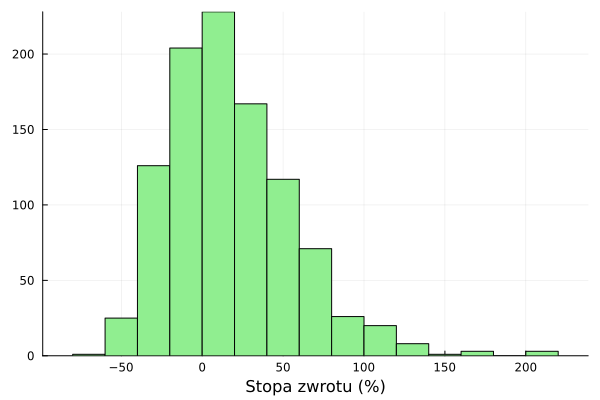

In [65]:
histogram(prc_rt2, 
    legend = false, 
    xlabel = "Stopa zwrotu (%)", 
    color="lightgreen",
    bins = 20)

In [66]:
percentile(prc_rt2, 1)

-44.451293638131304

In [67]:
percentile(prc_rt2, 10)

-25.50408565547058